# Use SLISE for Robust Regression

This notebook demonstrates how SLISE can be used for robust regression on a simple artificial dataset. The goal of robust regression is to be able to handle outliers in the data that might otherwise skew the results.

## Prerequisites

The examples in this notebook assumes that SLISE is installed, which can be done with:
```sh
pip install https://github.com/edahelsinki/pyslise
```

In [2]:
import slise
import numpy as np
from matplotlib import pyplot as plt

## Dataset

The dataset is a simple 2D dataset, but with outliers in one corner. These outliers cause issues with non-robust methods:

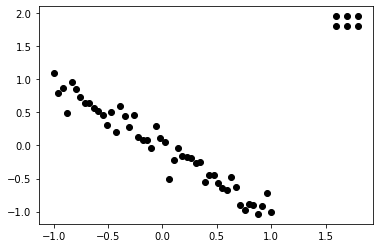

In [3]:
x = np.linspace(-1, 1, 50)
y = -x + np.random.normal(0, 0.15, 50)
x = np.concatenate(([1.6, 1.7, 1.8, 1.6, 1.7, 1.8], x))
y = np.concatenate(([1.8, 1.8, 1.8, 1.95, 1.95, 1.95], y))
plt.plot(x, y, "o", color="black",  label="Dataset")
plt.show()

## Robust Regression

Ordinary Least Squares regression on this dataset gives us a linear model that is of dubious value:

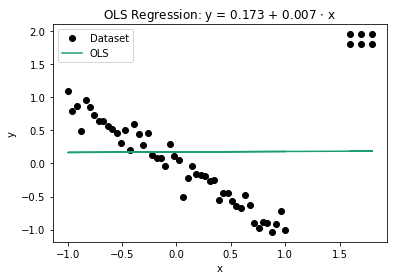

In [4]:
ols = np.linalg.lstsq(np.stack((np.ones_like(x), x), 1), y, None)[0]

plt.plot(x, y, "o", color="black",  label="Dataset")
plt.plot(x, ols[0] + x * ols[1], "-", color="#1b9e77", label="OLS")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"OLS Regression: y = {ols[0]:.3f} {'+' if ols[1] >= 0 else '-'} {np.abs(ols[1]):.3f} $\\cdot$ x")
plt.show()

SLISE, as a robust regression algorithm, is able to ignore the effect of the outliers and gives us a model that fits the majority of the points:

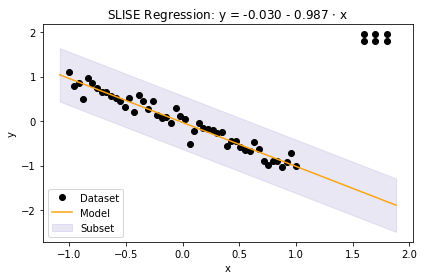

In [5]:
reg = slise.regression(x, y, 0.6, intercept=True)
reg.plot_2d()

## Parameters

The most important parameter for SLISE is the "error tolerance" (`epsilon`), which can be seen as the radius of the "corridor" in the plot above. The subset of points inside the corridor are assumed to be non-outliers, these are used for the regression. The points outside the corridor are potential outliers, and are, thus, ignored.

SLISE supports regularisation out-of-the-box, namely L1 (`lambda1`) and L2 (`lambda2`) regularisation.

Then there are some convenience options such as adding an intercept term to the model (`intercept`, by default on) and normalisation (`normalise`, by default off). The normalisation is especially important to consider when using regularisation. The built-in (column-wise) normalisation consists of subtracting the median and dividing by the median absolute deviation (this is a more robust alternative to the normal mean-sttdv normalisation).

There are also some other parameters, but these should have sensible defaults for a variety of datasets. Below is an example of parameter usage:


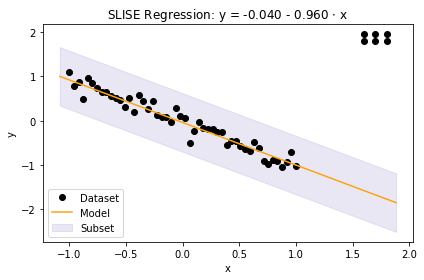

In [22]:
reg = slise.regression(x, y, epsilon=1.2, lambda1=1.0, lambda2=1.0, intercept=True, normalise=True)
reg.plot_2d()

## Just-In-Time compilation

The first call to `slise.regression` was a lot slower than the second call. This is because of the Just-In-Time (JIT) compilation. The use of JIT provides major performance boosts on subsequent uses, since the JIT compiled code is cached.